# PyCLIVAC Tutorial: Cartopy Projections with WRF Data

# Last Updated: 2021-05-17

# This brief tutorial will display a basic filled contour plot of data from WRF. The objective of this tutorial is look at how defining different plot and data projections in Cartopy changes our final result.

# See this StackOverflow question for additional information: https://stackoverflow.com/questions/42237802/plotting-projected-data-in-other-projectons-using-cartopy

### <u> Part 1: Import Packages </u>

In [38]:
#-------------------------------------------------------
import wrf
import numpy as np
import cartopy as c
import netCDF4 as nc4
import matplotlib.pyplot as plt
#-------------------------------------------------------

### <u> Part 2: Read in WRF Output File </u>

In [24]:
#-------------------------------------------------------
#Define path to wrf output file
wrf_out_path = '/home/sbarc/students/wrf4211/WRF/test/em_marian/wrfout_d01_2018-01-08_00:00:00'

#Read in wrf output file using netCDF4 package
wrf_out_file = nc4.Dataset(wrf_out_path)
#-------------------------------------------------------

### <u> Part 3: Pick WRF Variables that We Want from Output File </u>

In [25]:
#-------------------------------------------------------
#Great Documentation for WRF-Python Package: https://wrf-python.readthedocs.io/en/latest/index.html
#Get variables from output file that we want (This reads in all time steps - seems to take a while)
temp_2m = wrf.getvar(wrf_out_file, 'T2' , timeidx=wrf.ALL_TIMES) #2m temperature; units = K
#-------------------------------------------------------

### <u> Part 4: Get lat/lon Coordinates for Our Plotting Variables </u>

In [26]:
#-------------------------------------------------------
#Get lats and lons for whatever variables we are going to plot later
lats_temp_2m, lons_temp_2m = wrf.latlon_coords(temp_2m)
#-------------------------------------------------------

### <u> Part 5: Set Up Cartopy Map Subplots and Plot 2-meter Temperature for Each Subplot </u>

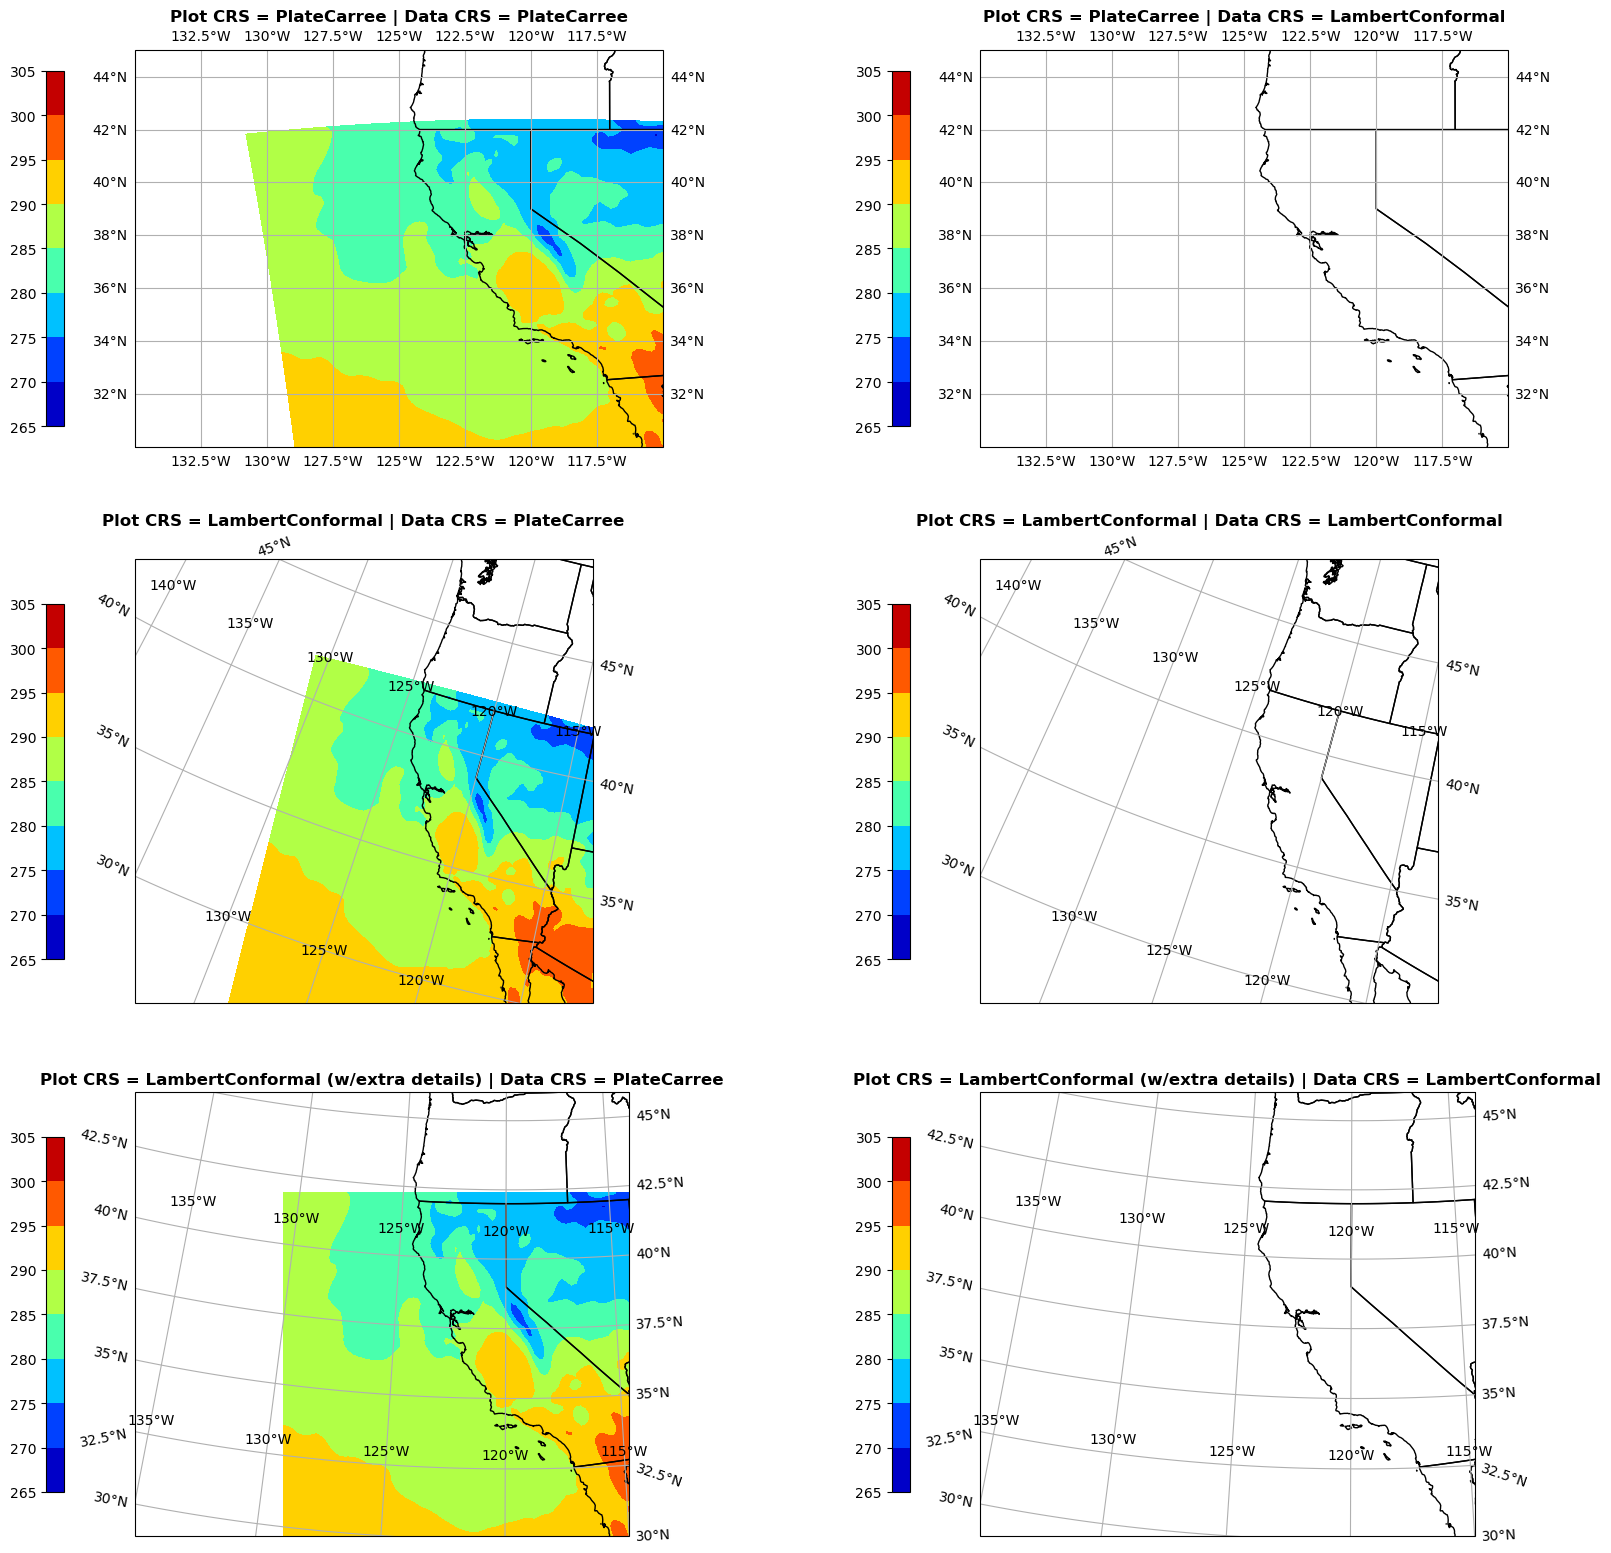

In [43]:
#----------------------------------------------------------------------------------------------
#Define plot coordinate reference system for each plot
#List of Cartopy projections: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
#All coordinate reference systems defined here use the default Globe
#For information on the default Globe see: https://scitools.org.uk/cartopy/docs/latest/crs/index.html#cartopy.crs.Globe
plot_crs_1 = c.crs.PlateCarree()
plot_crs_2 = c.crs.LambertConformal()
plot_crs_3 = c.crs.LambertConformal(central_longitude=-119.75, 
                                    central_latitude=34.25, standard_parallels=(30,60)) #These parameters come from my personal WRF namelist.wps file
#Define figure
fig = plt.figure(figsize=(20,20), dpi=100, clear=True)

#Define axis instances for each test that we will do
ax1 = plt.subplot(3,2,1, projection=plot_crs_1)
ax2 = plt.subplot(3,2,2, projection=plot_crs_1)
ax3 = plt.subplot(3,2,3, projection=plot_crs_2)
ax4 = plt.subplot(3,2,4, projection=plot_crs_2)
ax5 = plt.subplot(3,2,5, projection=plot_crs_3)
ax6 = plt.subplot(3,2,6, projection=plot_crs_3)

#Set map boundaries
left_lon  = -135
right_lon = -115
high_lat  = 45
low_lat   = 30

#Set extent of each map to be the same
ax1.set_extent((left_lon,right_lon,high_lat,low_lat))
ax2.set_extent((left_lon,right_lon,high_lat,low_lat))
ax3.set_extent((left_lon,right_lon,high_lat,low_lat))
ax4.set_extent((left_lon,right_lon,high_lat,low_lat))
ax5.set_extent((left_lon,right_lon,high_lat,low_lat))
ax6.set_extent((left_lon,right_lon,high_lat,low_lat))

#Add in a coastline and state drawings with decent resolution for all maps
ax1.add_feature(c.feature.STATES.with_scale('10m'))
ax2.add_feature(c.feature.STATES.with_scale('10m'))
ax3.add_feature(c.feature.STATES.with_scale('10m'))
ax4.add_feature(c.feature.STATES.with_scale('10m'))
ax5.add_feature(c.feature.STATES.with_scale('10m'))
ax6.add_feature(c.feature.STATES.with_scale('10m'))

#Add lat/lon grid for all maps
ax1.gridlines(draw_labels=True)
ax2.gridlines(draw_labels=True)
ax3.gridlines(draw_labels=True)
ax4.gridlines(draw_labels=True)
ax5.gridlines(draw_labels=True)
ax6.gridlines(draw_labels=True)
#----------------------------------------------------------------------------------------------
#Plot contourf for each plot using different plot and data coordinate reference systems
#HERE IS WHERE WE WILL SEE THE DIFFERENCES IN USING THE "TRANSFORM" KEYWORD WHEN USING "CONTOURF"
#----------------------------------------------------------------------------------------------
#Define the coordinate system that our data is in
data_crs_1 = c.crs.PlateCarree()
data_crs_2 = c.crs.LambertConformal()

data_crs_3 = c.crs.PlateCarree()
data_crs_4 = c.crs.LambertConformal()

data_crs_5 = c.crs.PlateCarree()
data_crs_6 = c.crs.LambertConformal()
#----------------------------------------------------------------------------------------------
#plot_crs = PlateCarree()
#data_crs = PlateCarree (1) or LambertConformal (2) (no plot produced with this)
aa=ax1.contourf(wrf.to_np(lons_temp_2m), wrf.to_np(lats_temp_2m), wrf.to_np(temp_2m[0]), transform=data_crs_1, cmap="jet")
bb=ax2.contourf(wrf.to_np(lons_temp_2m), wrf.to_np(lats_temp_2m), wrf.to_np(temp_2m[0]), transform=data_crs_2, cmap="jet")

#Add title to plots
ax1.set_title('Plot CRS = PlateCarree | Data CRS = PlateCarree', fontdict={'fontweight':'bold'})
ax2.set_title('Plot CRS = PlateCarree | Data CRS = LambertConformal', fontdict={'fontweight':'bold'})

#Add a colorbar
fig.colorbar(aa,ax=ax1,location='left', shrink=0.8)
fig.colorbar(bb,ax=ax2,location='left', shrink=0.8)
#----------------------------------------------------------------------------------------------
#plot_crs = LambertConformal()
#data_crs = PlateCarree (3) or LambertConformal (4) (no plot produced with LambertConformal)
cc=ax3.contourf(wrf.to_np(lons_temp_2m), wrf.to_np(lats_temp_2m), wrf.to_np(temp_2m[0]), transform=data_crs_3, cmap="jet")
dd=ax4.contourf(wrf.to_np(lons_temp_2m), wrf.to_np(lats_temp_2m), wrf.to_np(temp_2m[0]), transform=data_crs_4, cmap="jet")

#Add title to plots
ax3.set_title('Plot CRS = LambertConformal | Data CRS = PlateCarree', fontdict={'fontweight':'bold'})
ax4.set_title('Plot CRS = LambertConformal | Data CRS = LambertConformal', fontdict={'fontweight':'bold'})

#Add a colorbar
fig.colorbar(cc,ax=ax3,location='left', shrink=0.8)
fig.colorbar(dd,ax=ax4,location='left', shrink=0.8)
#----------------------------------------------------------------------------------------------
#plot_crs = LambertConformal(central_longitude=-119.75, central_latitude=34.25, standard_parallels=(30,60))
#data_crs = PlateCarree (5) or LambertConformal (5) (no plot produced with LambertConformal)
ee=ax5.contourf(wrf.to_np(lons_temp_2m), wrf.to_np(lats_temp_2m), wrf.to_np(temp_2m[0]), transform=data_crs_5, cmap="jet")
ff=ax6.contourf(wrf.to_np(lons_temp_2m), wrf.to_np(lats_temp_2m), wrf.to_np(temp_2m[0]), transform=data_crs_6, cmap="jet")

#Add title to plots
ax5.set_title('Plot CRS = LambertConformal (w/extra details) | Data CRS = PlateCarree', fontdict={'fontweight':'bold'})
ax6.set_title('Plot CRS = LambertConformal (w/extra details) | Data CRS = LambertConformal', fontdict={'fontweight':'bold'})

#Add a colorbar
fig.colorbar(ee,ax=ax5,location='left', shrink=0.8)
fig.colorbar(ff,ax=ax6,location='left', shrink=0.8)
#----------------------------------------------------------------------------------------------